# SVM Classification

Notebook adapted from the [05.07 Support Vector Machines notebook from the Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb).  
Modified by: Gábor Major  
Last Modified date: 2025-02-16

Import libraries.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Graphing Data  
Graph some sample data.

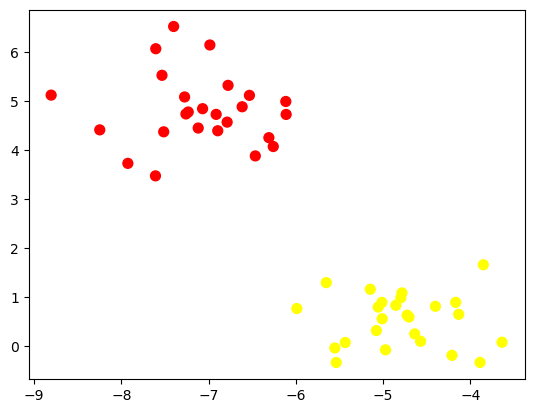

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=12, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Draw potential seperating lines for classifying.

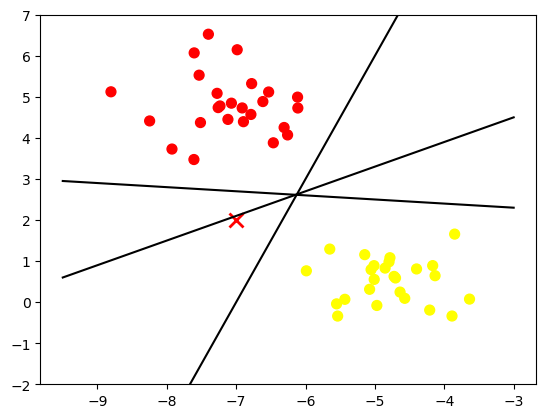

In [3]:
xfit = np.linspace(-9.5, -3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([-7], [2], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(3, 21), (0.6, 6.3), (-0.1, 2)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.ylim(-2, 7);

## Maximising margin
Visualise the margin of each dividing line.

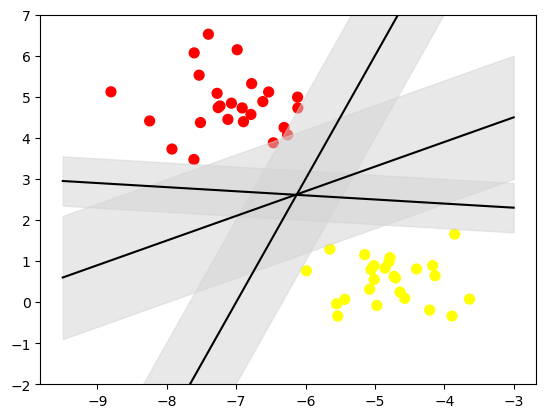

In [4]:
xfit = np.linspace(-9.5, -3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(3, 21, 2), (0.6, 6.3, 1.5), (-0.1, 2, 0.6)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.ylim(-2, 7);

## Fitting using SVC
Use Scikit-Learn's support vector classifier to train an SVM model.

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Visualise result model and support vectors.

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

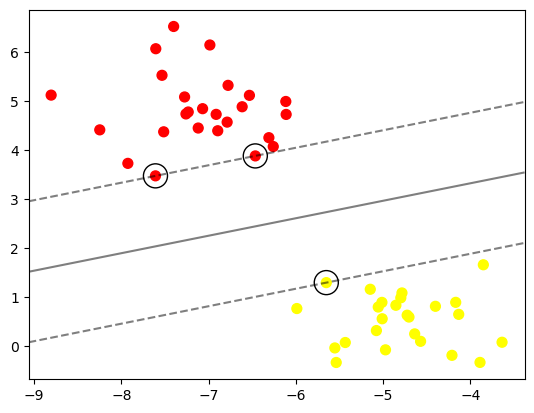

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Support vector coordinates.

In [8]:
model.support_vectors_

array([[-6.46485745,  3.88016113],
       [-7.60935929,  3.47299384],
       [-5.65109098,  1.29231457]])

Graph that only the closest points to the margin make a difference in the model, anything further away, as long as it's on the correct side does not matter.

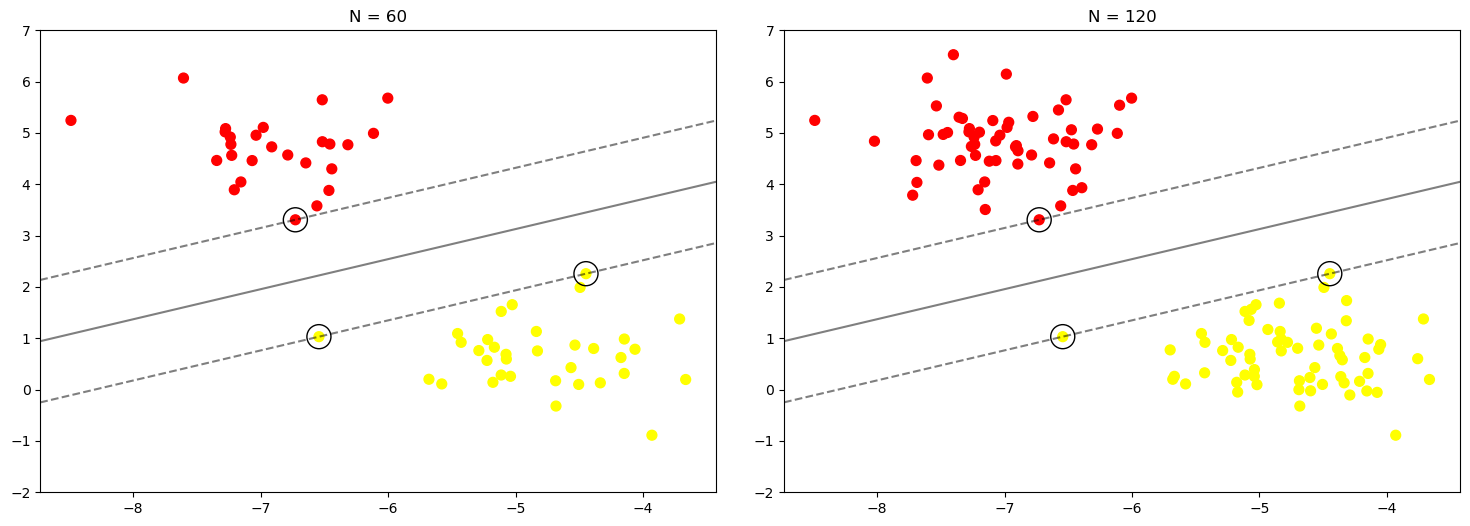

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=12, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    # ax.set_xlim(-1, 4)
    ax.set_ylim(-2, 7)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Using Kernel SVMs
Graph the non lineararily seperatable data and an SVM model.

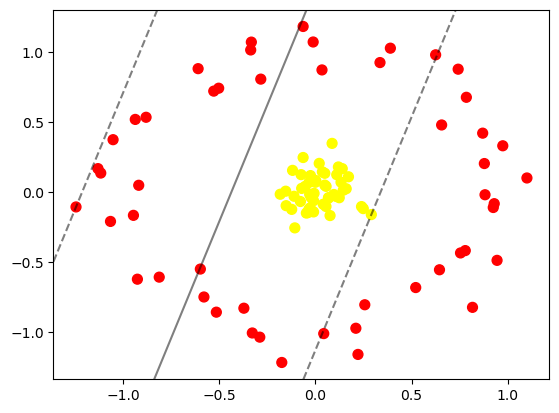

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Use radial basis function based on the centre clump to seperate data.

In [11]:
r = np.exp(-(X ** 2).sum(1))

Visualise the seperated data.

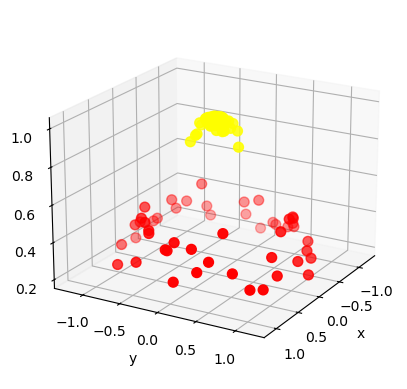

In [12]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');

Use the radial basis function which is built into Scikit-Learn's SVM, which runs through all possible points as the centre value for the radial basis function.

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Visualise the new SVM with the radial basis function.

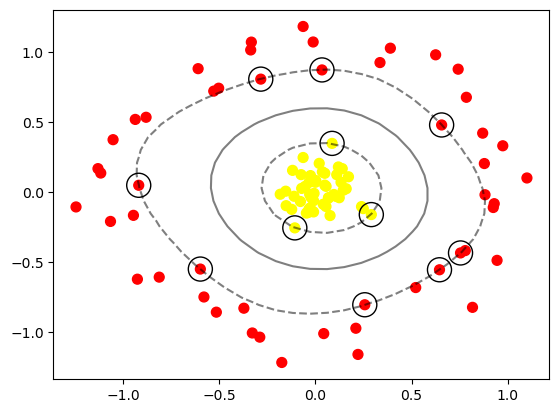

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Tuning SVM by softening margins
Graph less clean data sample.

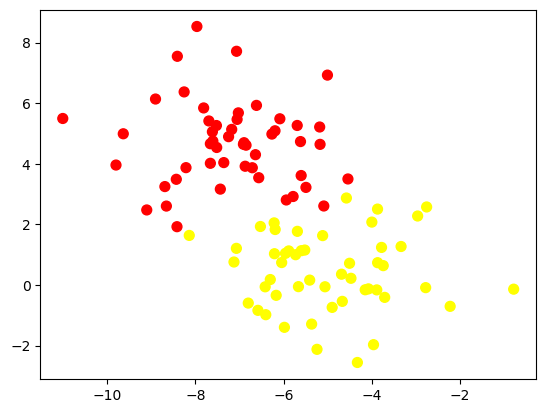

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=12, cluster_std=1.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Soften the margin of the model by making the C parameter smaller.

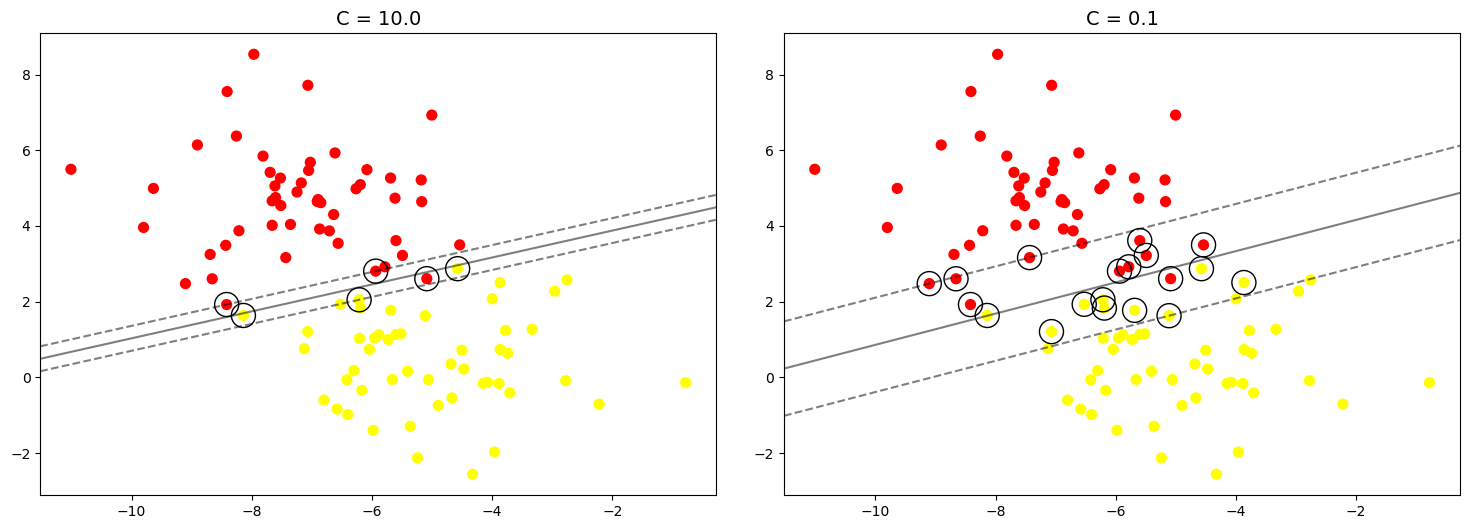

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=12, cluster_std=1.3)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Optimise C for data
Use GridSearchCV to test different values of C.

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [x / 100.0 for x in range(1, 100)]}
svc_model = SVC(kernel="linear")
grid = GridSearchCV(svc_model, param_grid, verbose=2)
grid.fit(X, y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.02; total time=   0.0s
[CV] END .............................................C=0.02; total time=   0.0s
[CV] END .............................................C=0.02; total time=   0.0s
[CV] END .............................................C=0.02; total time=   0.0s
[CV] END .............................................C=0.02; total time=   0.0s
[CV] END .............................................C=0.03; total time=   0.0s
[CV] END ......................................

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16,
                               0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24,
                               0.25, 0.26, 0.27, 0.28, 0.29, 0.3, ...]},
             verbose=2)

Visualise best result.

Best parameter for C from 0.01 to 0.99: 0.06


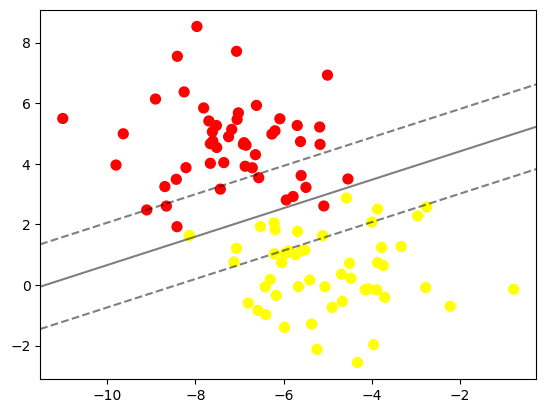

In [18]:
print("Best parameter for C from 0.01 to 0.99:", grid.best_params_["C"])
model = grid.best_estimator_
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=False)
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Classifying waste images
Set up SVM model to classify the images based on the waste dataset downloaded from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/908/realwaste) which was created for the following article: [RealWaste: A Novel Real-Life Data Set for Landfill Waste Classification Using Deep Learning](https://www.mdpi.com/2078-2489/14/12/633).  
The data contains images of real life garbage collected from a waste facility in Australia.

Import libraries

In [19]:
from PIL import Image
import os
from numpy import asarray
import numpy as np

Import the image paths from the waste data folder.

In [20]:
image_paths = []
data_location = '../realwaste-main/RealWaste/'
for waste_type in os.listdir(data_location):
    for waste_image in os.listdir(data_location + waste_type + '/'):
        image_paths.append(data_location + waste_type + '/' + waste_image)

Shuffle the paths, so that similar data is evenly distributed.

In [21]:
print(len(image_paths))
print(image_paths[:5])

4752
['../realwaste-main/RealWaste/Cardboard/Cardboard_1.jpg', '../realwaste-main/RealWaste/Cardboard/Cardboard_10.jpg', '../realwaste-main/RealWaste/Cardboard/Cardboard_100.jpg', '../realwaste-main/RealWaste/Cardboard/Cardboard_101.jpg', '../realwaste-main/RealWaste/Cardboard/Cardboard_102.jpg']


In [22]:
np.random.shuffle(image_paths)
print(image_paths[:5])

['../realwaste-main/RealWaste/Plastic/Plastic_522.jpg', '../realwaste-main/RealWaste/Glass/Glass_138.jpg', '../realwaste-main/RealWaste/Metal/Metal_56.jpg', '../realwaste-main/RealWaste/Food Organics/Food Organics_330.jpg', '../realwaste-main/RealWaste/Plastic/Plastic_735.jpg']


Load the images and create the data set.  
The images are shrunk down according to the following variable, from 0.0 to 1.0.  
Using the images at full size at 524 pixels uses a considerably large amount of memory when training the model.

In [23]:
image_size_precentage_amount = 0.1
image_size = Image.open(image_paths[0]).size
print("Actual image sizes: ", image_size)
print("Training image sizes: ",
      (round(image_size[0] * image_size_precentage_amount),
       round(image_size[1] * image_size_precentage_amount)))

Actual image sizes:  (524, 524)
Training image sizes:  (52, 52)


In [24]:
waste_data = {'data': [], 'images': [], 'target': [], 'target_names': []}

for waste_image_path in image_paths:
    image = Image.open(waste_image_path)
    image = image.resize((round(image.size[0] * image_size_precentage_amount),
                          round(image.size[1] * image_size_precentage_amount)))
    numpy_image = asarray(image)
    
    waste_data['data'].append(numpy_image.reshape(-1))
    waste_data['images'].append(numpy_image)
    
    waste_type = waste_image_path.split('/')[-2]
    if waste_type not in waste_data['target_names']:
        waste_data['target_names'].append(waste_type)
    waste_data['target'].append(waste_data['target_names'].index(waste_type))

Visualise the shuffled data.

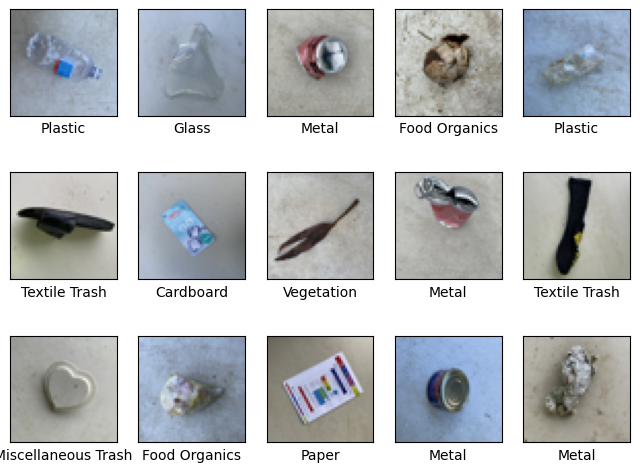

In [25]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(waste_data['images'][i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=waste_data['target_names'][waste_data['target'][i]])

Use Principal Component Analysis to extract component data to use in the support vector classifier model.

In [26]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=100, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Split the data into training and testing.

In [27]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(waste_data['data'], waste_data['target'], random_state=42)

Use GridSearchCV to go through values for C and gamma. Gamma is used to change the size of the radial basis function kernel used in the SVC.

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.001, 0.005, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=2)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   4.4s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   3.6s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   3.1s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   3.1s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   6.3s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=   3.3s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=   3.3s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=   5.1s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=   5.2s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=   7.9s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=   3.8s
[CV] END ..........................svc__C=1, svc_

Select the best parameters and model.

In [29]:
print(grid.best_params_)
model = grid.best_estimator_
yfit = model.predict(Xtest)

{'svc__C': 5, 'svc__gamma': 0.01}


Show the images as being labeled correctly or incorrectly.

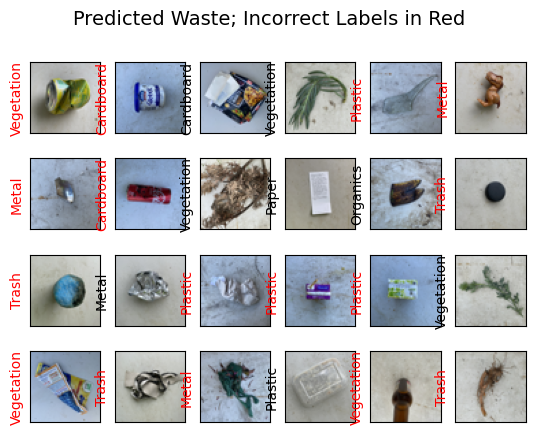

In [30]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(round(image_size[0] * image_size_precentage_amount),
                                round(image_size[1] * image_size_precentage_amount),
                                3), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(waste_data['target_names'][yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Waste; Incorrect Labels in Red', size=14);

Show the classification report.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=waste_data['target_names']))

                     precision    recall  f1-score   support

            Plastic       0.61      0.65      0.63       243
              Glass       0.74      0.61      0.67       110
              Metal       0.55      0.62      0.59       196
      Food Organics       0.63      0.54      0.58       100
      Textile Trash       0.34      0.29      0.31        73
          Cardboard       0.54      0.49      0.51       113
         Vegetation       0.51      0.76      0.61       100
Miscellaneous Trash       0.35      0.32      0.33       128
              Paper       0.72      0.61      0.66       125

           accuracy                           0.56      1188
          macro avg       0.56      0.54      0.54      1188
       weighted avg       0.57      0.56      0.56      1188



Show the confusion matrix of the model.

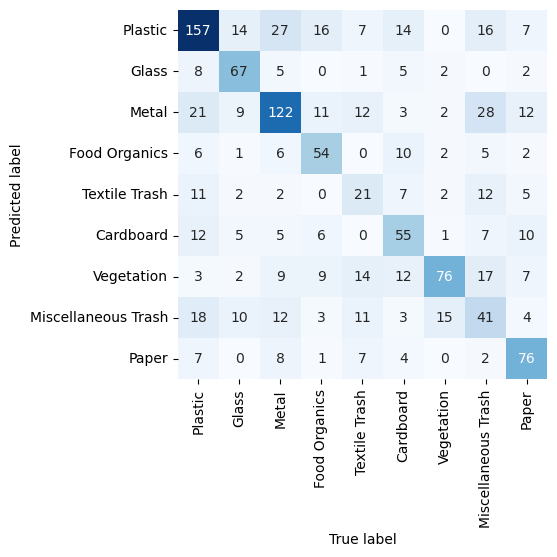

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=waste_data['target_names'],
            yticklabels=waste_data['target_names'])
plt.xlabel('True label')
plt.ylabel('Predicted label');

Save and load the model.

In [33]:
import pickle
with open('models/svm_waste.pkl', 'wb') as f:
    pickle.dump(model, f)

In [34]:
with open('models/svm_waste.pkl', 'rb') as f:
    model = pickle.load(f)

Set a path for the image to be predicted and output the result and the resized image used.

Cardboard


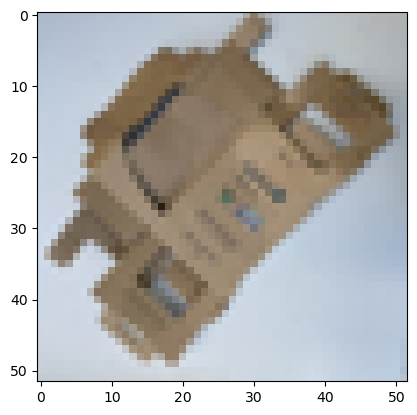

In [35]:
testing_image_path = '../realwaste-main/RealWaste/Cardboard/Cardboard_41.jpg'
image = Image.open(testing_image_path)
image = image.resize((round(image.size[0] * image_size_precentage_amount),
                      round(image.size[1] * image_size_precentage_amount)))
numpy_image = asarray(image)

result = model.predict([numpy_image.reshape(-1)])
plt.imshow(image, cmap='bone')
print(waste_data['target_names'][result[0]])